In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import random

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

%matplotlib inline
# plt.ion()
# plt.style.use(['dark_background'])

In [2]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# df_transaction = pd.read_csv('/home/glitch/DSiPlus9/Capstone-Mark/ieee-fraud-detection/train_transaction.csv', nrows=1500)
# df_identity = pd.read_csv('/home/glitch/DSiPlus9/Capstone-Mark/ieee-fraud-detection/test_identity.csv', nrows=1500)
# df_transaction.to_csv('transaction.csv')
# df_identity.to_csv('identity.csv')

In [ ]:
# df = pd.read_csv('/home/glitch/DSiPlus9/Capstone-Mark/ieee-fraud-detection/train_transaction.csv')

In [3]:
n = 590540 #number of records in file
s = 100000 #desired sample size
win_data_source = '/Users/andre/DSi9plus/Capstone-Mark/train_transaction.csv'
skip = sorted(random.sample(range(n),n-s))
df_transaction = pd.read_csv(win_data_source, skiprows=skip)

In [4]:
df_cols = pd.read_csv(win_data_source, nrows=1)

In [51]:
# df_transaction = pd.read_csv('transaction.csv')
# df_identity = pd.read_csv('identity.csv')
# win_data_source = '/Users/andre/DSi9plus/Capstone-Mark/train_transaction.csv'
# linux_data_source = '/home/glitch/DSiPlus9/Capstone-Mark/ieee-fraud-detection/'
# df_transaction = pd.read_csv(win_data_source)

In [3]:
df_transaction = pd.read_csv('/Users/andre/DSi9plus/Capstone-Mark/train_transaction.csv')
df_test = pd.read_csv('/Users/andre/DSi9plus/Capstone-Mark/test_transaction.csv')

In [5]:
df_transaction.columns = df_cols.columns

In [53]:
df_transaction.shape

(100000, 394)

In [22]:
df_transaction.shape

(10000, 394)

In [ ]:
df_transaction.dtypes

In [ ]:
# CREATE TABLE transactions(
 
# idx numeric, TransactionID numeric, isFraud numeric, TransactionDT numeric, TransactionAmt float, ProductCD text, card1 numeric, card2 float,
# card3 float, card4 text, card5 float, card6 text, addr1 float, addr2 float, dist1 float, dist2 float, P_emaildomain text, R_emaildomain text,
# C1 float, C2 float, C3 float, C4 float, C5 float, C6 float, C7 float, C8 float, C9 float, C10 float, C11 float, C12 float, C13 float, C14 float,
# D1 float, D2 float, D3 float, D4 float, D5 float, D6 float, D7 float, D8 float, D9 float, D10 float, D11 float, D12 float, D13 float, D14 float,
# M1 text, M2 text, M3 text, M4 text, M5 text, M6 text, M7 text, M8 text, M9 text, V1 float, V2 float, V3 float, V4 float, V5 float, V6 float, 
# V7 float, V8 float, V9 float, V10 float, V11 float, V12 float, V13 float, V14 float, V15 float, V16 float, V17 float, V18 float, V19 float, 
# V20 float, V21 float, V22 float, V23 float, V24 float, V25 float, V26 float, V27 float, V28 float, V29 float, V30 float, V31 float, V32 float, 
# V33 float, V34 float, V35 float, V36 float, V37 float, V38 float, V39 float, V40 float, V41 float, V42 float, V43 float, V44 float, V45 float, 
# V46 float, V47 float, V48 float, V49 float, V50 float, V51 float, V52 float, V53 float, V54 float, V55 float, V56 float, V57 float, V58 float, 
# V59 float, V60 float, V61 float, V62 float, V63 float, V64 float, V65 float, V66 float, V67 float, V68 float, V69 float, V70 float, V71 float, 
# V72 float, V73 float, V74 float, V75 float, V76 float, V77 float, V78 float, V79 float, V80 float, V81 float, V82 float, V83 float, V84 float, 
# V85 float, V86 float, V87 float, V88 float, V89 float, V90 float, V91 float, V92 float, V93 float, V94 float, V95 float, V96 float, V97 float, 
# V98 float, V99 float, V100 float, V101 float, V102 float, V103 float, V104 float, V105 float, V106 float, V107 float, V108 float, V109 float, 
# V110 float, V111 float, V112 float, V113 float, V114 float, V115 float, V116 float, V117 float, V118 float, V119 float, V120 float, V121 float, 
# V122 float, V123 float, V124 float, V125 float, V126 float, V127 float, V128 float, V129 float, V130 float, V131 float, V132 float, V133 float, 
# V134 float, V135 float, V136 float, V137 float, V138 float, V139 float, V140 float, V141 float, V142 float, V143 float, V144 float, V145 float, 
# V146 float, V147 float, V148 float, V149 float, V150 float, V151 float, V152 float, V153 float, V154 float, V155 float, V156 float, V157 float, 
# V158 float, V159 float, V160 float, V161 float, V162 float, V163 float, V164 float, V165 float, V166 float, V167 float, V168 float, V169 float, 
# V170 float, V171 float, V172 float, V173 float, V174 float, V175 float, V176 float, V177 float, V178 float, V179 float, V180 float, V181 float, 
# V182 float, V183 float, V184 float, V185 float, V186 float, V187 float, V188 float, V189 float, V190 float, V191 float, V192 float, V193 float, 
# V194 float, V195 float, V196 float, V197 float, V198 float, V199 float, V200 float, V201 float, V202 float, V203 float, V204 float, V205 float, 
# V206 float, V207 float, V208 float, V209 float, V210 float, V211 float, V212 float, V213 float, V214 float, V215 float, V216 float, V217 float, 
# V218 float, V219 float, V220 float, V221 float, V222 float, V223 float, V224 float, V225 float, V226 float, V227 float, V228 float, V229 float, 
# V230 float, V231 float, V232 float, V233 float, V234 float, V235 float, V236 float, V237 float, V238 float, V239 float, V240 float, V241 float, 
# V242 float, V243 float, V244 float, V245 float, V246 float, V247 float, V248 float, V249 float, V250 float, V251 float, V252 float, V253 float, 
# V254 float, V255 float, V256 float, V257 float, V258 float, V259 float, V260 float, V261 float, V262 float, V263 float, V264 float, V265 float, 
# V266 float, V267 float, V268 float, V269 float, V270 float, V271 float, V272 float, V273 float, V274 float, V275 float, V276 float, V277 float, 
# V278 float, V279 float, V280 float, V281 float, V282 float, V283 float, V284 float, V285 float, V286 float, V287 float, V288 float, V289 float,
# V290 float, V291 float, V292 float, V293 float, V294 float, V295 float, V296 float, V297 float, V298 float, V299 float, V300 float, V301 float, 
# V302 float, V303 float, V304 float, V305 float, V306 float, V307 float, V308 float, V309 float, V310 float, V311 float, V312 float, V313 float, 
# V314 float, V315 float, V316 float, V317 float, V318 float, V319 float, V320 float, V321 float, V322 float, V323 float, V324 float, V325 float, 
# V326 float, V327 float, V328 float, V329 float, V330 float, V331 float, V332 float, V333 float, V334 float, V335 float, V336 float, V337 float, 
# V338 float, V339 float);

In [3]:
dfn = pd.read_csv('/Users/andre/DSi9plus/Capstone-Mark/train_transaction.csv', nrows=10)
dft = pd.read_csv('/Users/andre/DSi9plus/Capstone-Mark/test_transaction.csv', nrows=10)

In [4]:
dfn

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,nan,150.00,discover,142.00,credit,315.00,87.00,19.00,nan,NaN,nan,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,13.00,13.00,nan,nan,nan,0.00,T,T,T,M2,F,T,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,nan,nan,gmail.com,nan,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan,0.00,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.

In [5]:
dft

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.00,150.00,visa,226.00,debit,170.00,87.00,1.00,nan,gmail.com,nan,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,nan,nan,409.00,T,T,F,NaN,NaN,F,T,T,T,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,47.95,0.00,0.00,47.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,47.95,0.00,0.00,47.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,3663550,18403263,49.00,W,4272,111.00,150.00,visa,226.00,debit,299.00,87.00,4.00,nan,aol.com,nan,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,634.00,nan,nan,nan,634.00,T,F,F,M0,NaN,F,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.0

In [23]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987033,0,87078,40.00,W,8613,272.00,150.00,mastercard,224.00,debit,264.00,87.00,nan,nan,yahoo.com,NaN,2.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,6.00,2.00,121.00,121.00,121.00,400.00,121.00,nan,nan,nan,nan,121.00,nan,nan,nan,nan,121.00,NaN,NaN,NaN,M1,T,F,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2987119,0,88484,100.00,H,2456,399.00,150.00,american express,118.00,credit,299.00,87.00,nan,nan,anonymous.com,anonymous.com,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,128.00,0.00,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,na

In [6]:
df_transaction.isFraud.value_counts()

0    96523
1     3477
Name: isFraud, dtype: int64

In [4]:
#Create a new data frame with columns that starts with V.
df_vtran = df_transaction[[x for x in df_transaction.columns if x[0] == 'V']]

In [5]:
#Create a new data frame with columns that starts with V.
df_vtest = df_test[[x for x in df_test.columns if x[0] == 'V']]

In [16]:
df_ctran

,card1,card2,card3,card4,card5,card6
0,13926,nan,150.00,discover,142.00,credit
1,2755,404.00,150.00,mastercard,102.00,credit
2,4663,490.00,150.00,visa,166.00,debit
3,18132,567.00,150.00,mastercard,117.00,debit
4,4497,514.00,150.00,mastercard,102.00,credit
...,...,...,...,...,...,...
590535,6550,nan,150.00,visa,226.00,debit
590536,10444,225.00,150.00,mastercard,224.00,debit
590537,12037,595.00,150.00,mastercard,224.00,debit
590538,7826,481.00,150.00,mastercard,224.00,debit


In [ ]:
# df_vtran = df_vtran.join(df_transaction['TransactionDT']).join(df_transaction['TransactionAmt'])

In [26]:
df_vtran.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=339)

In [37]:
#shape
print('Number of rows: {} \nNumber of columns {} '.format(df_vtran.shape[0], df_vtran.shape[1]))

Number of rows: 10000 
Number of columns 339 


In [6]:
df_vtran = df_vtran.fillna(value=0)
df_vtest = df_vtest.fillna(value=0)

In [57]:
df_vtran.dropna(how='all',inplace=True,axis=1)

In [ ]:
df_vtran.describe()

In [ ]:
# Plot amount
# plt.figure(figsize=(10,8))
# plt.title('Transaction Date Distribution')
# sns.distplot(df_vtran['TransactionDT'])

In [ ]:
# Plot amount
# plt.figure(figsize=(10,8))
# plt.title('Amount Distribution')
# sns.distplot(df_vtran['TransactionAmt'])

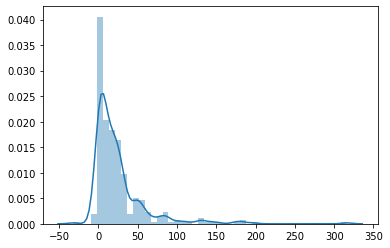

In [58]:
#skewness
skew_ = df_vtran.skew()
sns.distplot(skew_)

In [7]:
ss = StandardScaler()
scaled_vtran = ss.fit_transform(df_vtran) 
scaled_vtest = ss.fit_transform(df_vtest) 

In [8]:
dfs_vtran = pd.DataFrame(scaled_vtran,columns=[x for x in df_vtran.columns])
dfs_vtest = pd.DataFrame(scaled_vtest,columns=[x for x in df_vtest.columns])

In [10]:
dfs_vtest.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,0.73,0.59,0.49,0.84,0.74,0.59,0.51,0.66,0.61,1.48,1.37,-1.09,-1.09,0.16,-0.38,-0.37,-0.55,-0.55,-2.05,-1.91,-0.56,-0.54,-0.06,-0.11,-4.78,-4.04,-0.15,-0.15,-0.67,-0.65,-0.56,-0.54,-0.41,-0.42,1.06,0.96,0.03,-0.02,-0.46,-0.44,0.42,-0.52,-0.50,0.07,0.03,0.33,0.28,1.56,1.45,-0.54,-0.40,-0.40,-1.15,-1.15,-0.10,-0.15,-0.38,-0.37,-0.54,-0.51,-2.06,-1.89,-0.55,-0.50,0.16,-4.26,-3.70,-0.15,-0.67,-0.65,-0.55,-0.54,-0.40,-0.42,-1.02,-1.03,-0.09,-0.14,-0.37,-0.52,-0.49,0.37,0.27,-0.55,-0.51,-0.07,-0.11,0.16,-0.15,1.36,1.23,-0.56,-0.54,-0.42,-0.27,-0.10,-0.32,-0.21,0.02,-0.32,-0.18,-0.15,-0.17,-0.15,-0.13,-0.13,0.00,-0.07,-0.14,-0.10,-0.05,-0.08,-0.06,-0.10,-0.19,-0.13,-0.03,-0.05,-0.04,-0.04,-0.08,-0.05,-0.15,-0.26,-0.18,-0.03,-0.06,-0.05,-0.03,-0.10,-0.08,-0.02,-0.03,-0.02,-0.04,-0.05,-0.04,-0.04,-0.26,-0.21,-0.07,-0.06,-0.12,-0.12,-0.12,-0.09,-0.08,-0.34,-0.34,-0.11,-0.15,-0.15,-0.35,-0.34,-0.34,-0.34,-0.33,-0.32,-0.11,-0.11,-0.04,-0.04,-0.04,-0.05,-0.10,-0.10,-0.08,-0.09,-0.09,-0.31,-0.27,-0.07,-0.10,-0.17,-0.12,-0.14,-0.05,-0.07,-0.06,-0.05,-0.07,-0.06,-0.07,-0.13,-0.12,-0.39,-0.14,-0.47,-0.36,-0.13,-0.50,-0.31,-0.38,-0.56,-0.46,-0.41,-0.56,-0.39,-0.13,-0.38,-0.30,-0.02,-0.03,-0.02,-0.02,-0.01,-0.03,-0.08,-0.05,-0.06,-0.01,-0.02,-0.01,-0.02,-0.02,-0.01,-0.08,-0.08,-0.07,-0.06,-0.27,-0.11,-0.13,-0.10,-0.13,-0.02,-0.07,-0.13,-0.12,-0.11,-0.06,-0.06,-0.05,-0.07,-0.13,-0.08,-0.12,-0.12,-0.12,-0.58,-0.58,-0.47,-0.38,-0.46,-0.34,-0.12,-0.56,-0.46,-0.52,-0.49,-0.45,-0.55,-0.24,-0.44,-0.42,-0.37,-0.12,-0.11,-0.29,-0.51,-0.26,-0.42,-0.02,-0.02,-0.02,-0.01,-0.02,-0.02,-0.01,-0.06,-0.05,-0.06,-0.01,-0.02,-0.01,-0.02,-0.01,-0.01,-0.26,-0.31,-0.16,-0.71,-0.64,-0.26,-0.06,-0.16,-0.38,-0.43,-0.39,-0.18,-0.11,-0.17,-0.17,-0.11,-0.16,-0.11,-0.12,-0.12,-0.12,-0.17,-0.18,-0.57,-0.50,-0.54,0.00,-0.03,-0.06,-0.05,-0.04,-0.13,-0.02,-0.09,-0.22,-0.22,-0.23,-0.02,-0.03,-0.02,-0.03,-0.03,-0.02,-0.08,-0.08,-0.08,-0.07,-0.07,-0.07,-0.05,-0.04,-0.05,-0.01,-0.02,-0.01,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01
1,0.73,0.59,0.49,0.84,0.74,0.59,0.51,0.66,0.61,-0.63,-0.61,0.87,0.77,0.16,-0.38,-0.37,-0.55,-0.55,0.39,0.30,-0.56,-0.54,-0.06,-0.11,0.10,0.05,-0.15,-0.15,-0.67,-0.65,-0.56,-0.54,-0.41,-0.42,1.06,0.96,0.03,-0.02,-0.46,-0.44,0.42,-0.52,-0.50,0.07,0.03,0.33,0.28,-0.60,-0.59,-0.54,-0.40,-0.40,-1.15,-1.15,-0.10,-0.15,-0.38,-0.37,-0.54,-0.51,0.34,0.24,-0.55,-0.50,0.16,0.04,-0.02,-0.15,-0.67,-0.65,-0.55,-0.54,-

In [ ]:
#skewness
skew_ = dfs_vtran.skew()
sns.distplot(skew_)

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# def prepare_inputs(ds):
#     oe = OrdinalEncoder()
#     ds = oe.fit_transform(ds)
#     return ds

In [ ]:
# ## back to dataframe and add our headers
# df = prepare_inputs(dfs_vtran)
# dfs_vtran_new = pd.DataFrame(data=df, columns=dfs_vtran.columns)

In [19]:
dfs_vtran = df_vtran.join(df_transaction['isFraud'])

### SMOTE

In [14]:
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(dfs_vtran.drop('isFraud', axis=1), dfs_vtran['isFraud'])
# oversampled_trainX, oversampled_trainY = sm.fit_sample(df_job_new.drop('salary'), df_job_new['salary'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
# oversampled_train.columns = ['salary', 'job_title', 'company_name', 'location', 'position', 'description']

### SMOTEEN

In [10]:
smote_enn = SMOTEENN(random_state=0)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = smote_enn.fit_resample(dfs_vtran.drop('isFraud', axis=1), dfs_vtran['isFraud'])
# oversampled_trainX, oversampled_trainY = sm.fit_sample(df_job_new.drop('salary'), df_job_new['salary'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
# oversampled_train.columns = ['salary', 'job_title', 'company_name', 'location', 'position', 'description']

In [9]:
# oversampled_train.to_csv('cleaned_train_transactions.csv', index=False)
# dfs_vtest.to_csv('cleaned_test_transactions.csv', index=False)

### Undersampler

In [14]:
from imblearn.under_sampling import RandomUnderSampler

In [17]:
rus = RandomUnderSampler(random_state=0)

In [20]:
# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = rus.fit_resample(dfs_vtran.drop('isFraud', axis=1), dfs_vtran['isFraud'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)

In [59]:
df2 = pd.read_csv('/Users/andre/DSi9plus/Capstone-Mark/cleaned_train_transactions.csv')
df3 = pd.read_csv('/Users/andre/DSi9plus/Capstone-Mark/cleaned_test_transactions.csv')

In [18]:
df2.shape

(952119, 341)

In [19]:
df3.shape

(506691, 340)

In [60]:
df2.drop(columns='Unnamed: 0', inplace=True)
df3.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
sns.distplot(oversampled_train.isFraud,kde=False, bins=20)

In [22]:
X = oversampled_train.drop(columns='isFraud')
y = oversampled_train.isFraud
# X = df2.drop(columns='isFraud')
# y = df2.isFraud
# X = skl_pca

In [23]:
rfc = RandomForestClassifier()

In [25]:
rfc.fit(X, y)
rfc_y_pred_class = rfc.predict(dfs_vtest)

In [26]:
df_rfc_pred = pd.DataFrame(rfc_y_pred_class)

In [31]:
df_rfc_pred.to_csv('rfc_pred.csv', index=False)

In [28]:
df_rfc_pred.columns = ['isFraud']

In [53]:
df_rfc_pred = pd.read_csv('rfc_pred.csv')

In [45]:
df_rfc_pred.drop(columns='Unnamed: 0', axis=1, inplace=True)

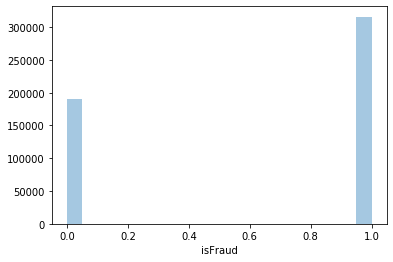

In [29]:
sns.distplot(df_rfc_pred.isFraud,kde=False, bins=20)

In [30]:
df_rfc_pred

,isFraud
0,0
1,1
2,1
3,0
4,0
...,...
506686,1
506687,1
506688,1
506689,1


In [15]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,nan,150.00,discover,142.00,credit,315.00,87.00,19.00,nan,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,13.00,13.00,nan,nan,nan,0.00,T,T,T,M2,F,T,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan,0.00,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.

In [32]:
df_rfc_pred.insert(0, 'TransactionID', df_test['TransactionID'])

In [33]:
df_rfc_pred.to_csv('RFC_Prediction.csv', index=False)

In [34]:
df_rfc_pred

,TransactionID,isFraud
0,3663549,0
1,3663550,1
2,3663551,1
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,1
506687,4170236,1
506688,4170237,1
506689,4170238,1


In [35]:
xgbc = XGBClassifier()

In [36]:
xgbc.fit(X, y)
xgbc_y_pred_class = xgbc.predict(dfs_vtest)

In [37]:
df_xgbc_pred = pd.DataFrame(xgbc_y_pred_class)

In [39]:
df_xgbc_pred.columns = ['isFraud']

In [41]:
df_xgbc_pred.insert(0, 'TransactionID', df_test['TransactionID'])

In [42]:
df_xgbc_pred.to_csv('xgbc_pred.csv', index=False)

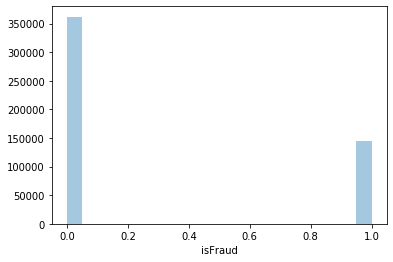

In [40]:
sns.distplot(df_xgbc_pred.isFraud,kde=False, bins=20)

In [43]:
df_xgbc_pred

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,1
506687,4170236,1
506688,4170237,0
506689,4170238,0


In [ ]:
sns.boxplot(oversampled_train.isFraud)

In [ ]:
#skewness
skew_ = oversampled_train.skew()
sns.distplot(skew_)

### Remove extreme outliers

In [37]:
Q1 = np.quantile(oversampled_train, 0.25)
Q3 = np.quantile(oversampled_train, 0.75)
IQR = Q3 - Q1

df2 = oversampled_train[~((oversampled_train < (Q1 - 2.5 * IQR)) | (oversampled_train > (Q3 + 2.5 * IQR))).any(axis=1)]
df2.reset_index(drop=True, inplace=True)

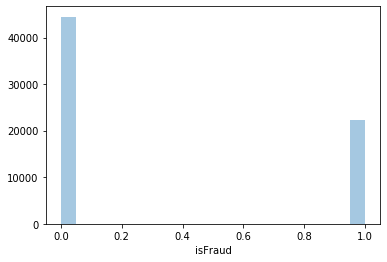

In [38]:
sns.distplot(df2.isFraud,kde=False, bins=20)

In [17]:
# df2.to_csv('cleaned_train_transactions.csv',index=False)

### X,y labels

In [13]:
X = oversampled_train.drop(columns='isFraud')
y = oversampled_train.isFraud
# X = df2.drop(columns='isFraud',axis=1)
# y = df2.isFraud
# X = dfs_vtran.drop(columns='isFraud',axis=1)
# y = dfs_vtran.isFraud

### T-SNE

In [15]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

### PCA

In [62]:
pca = PCA(n_components=30)
skl_pca = pca.fit_transform(X)

In [63]:
skl_pca

array([[-4.54832593e+03, -8.21370231e+02, -1.06779333e+02, ...,
        -1.77901367e+00, -1.76112790e+00,  5.76005799e+00],
       [-4.54808594e+03, -9.53151438e+02, -2.28681325e+02, ...,
        -5.37451631e+00,  3.01959062e-01,  5.72488976e+00],
       [-4.54808596e+03, -9.53151456e+02, -2.28681157e+02, ...,
        -5.37581603e+00,  3.02901427e-01,  5.72341894e+00],
       ...,
       [-4.54902375e+03, -6.14154080e+02,  9.39783656e+00, ...,
        -1.11372761e+02, -1.59974586e+01,  7.61286779e+01],
       [ 5.51493521e+05, -4.97126050e+02,  2.24913513e+02, ...,
         2.96517568e+01,  7.97964911e+01,  1.64095361e+02],
       [-4.54808593e+03, -9.53151322e+02, -2.28684620e+02, ...,
        -5.35418891e+00,  2.84064729e-01,  5.72597516e+00]])

In [17]:
pca.components_.shape

(30, 339)

In [50]:
pca.explained_variance_ratio_

array([9.39772403e-01, 5.36673015e-02, 2.28370324e-03, 1.52449176e-03,
       7.57709272e-04, 5.48416587e-04, 3.40344311e-04, 2.30943510e-04,
       1.90608461e-04, 1.56993360e-04, 1.16962163e-04, 9.15739510e-05,
       5.65406297e-05, 4.08652674e-05, 3.10141761e-05, 2.57862015e-05,
       2.10901459e-05, 1.85876220e-05, 1.68760467e-05, 1.56542037e-05,
       1.13573005e-05, 9.91360965e-06, 9.48126276e-06, 7.62683056e-06,
       6.88470190e-06, 6.10146542e-06, 5.20749503e-06, 3.84867859e-06,
       3.28315611e-06, 3.01750802e-06])

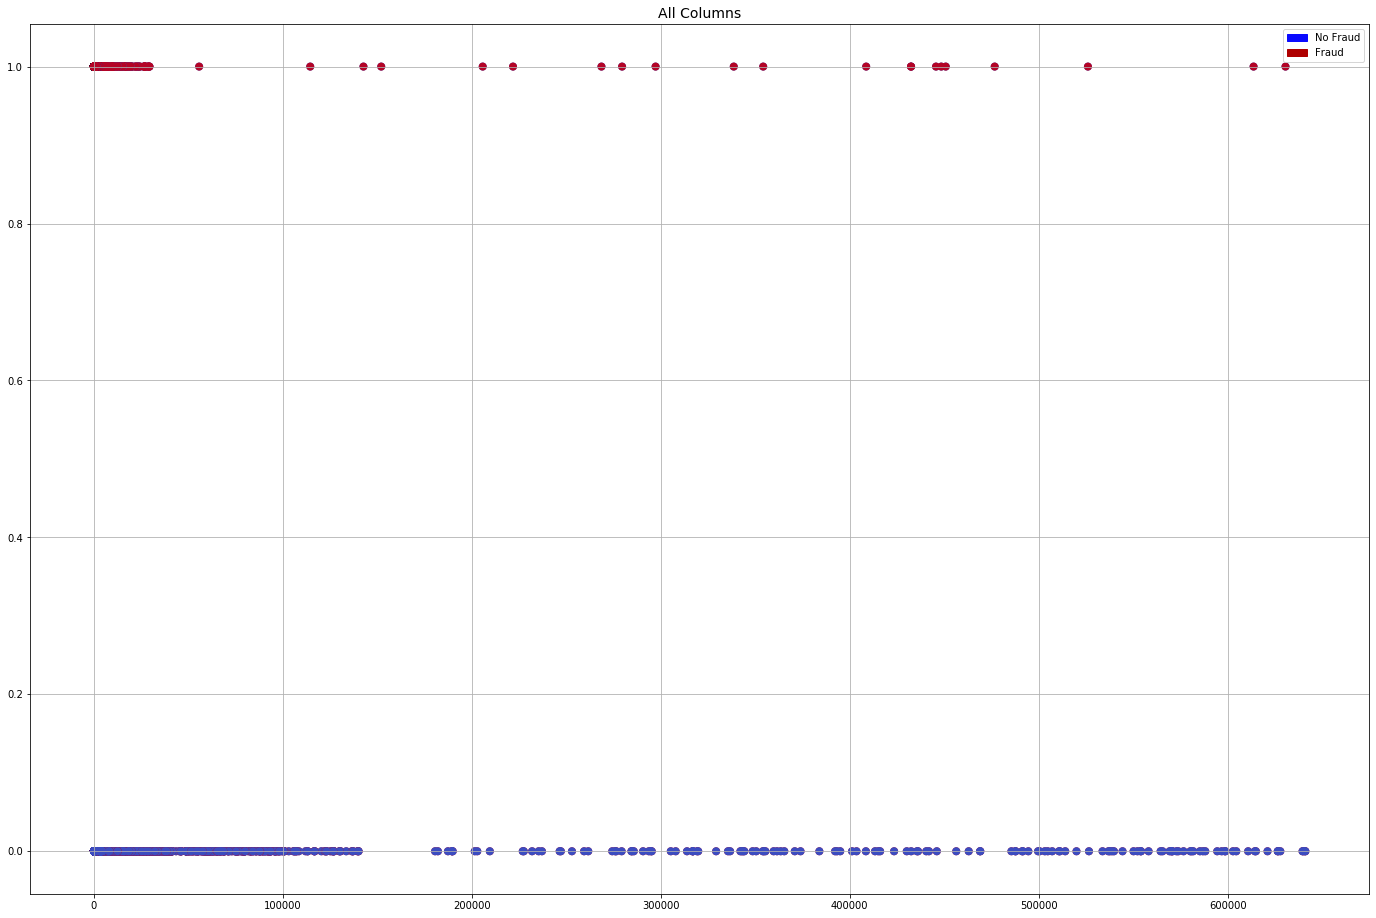

In [51]:
# All Columns scatter plot
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

for i in range(0, 339):
    ax.scatter(X.iloc[:,i], y, c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
    ax.scatter(X.iloc[:,i], y, c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)

ax.set_title('All Columns', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

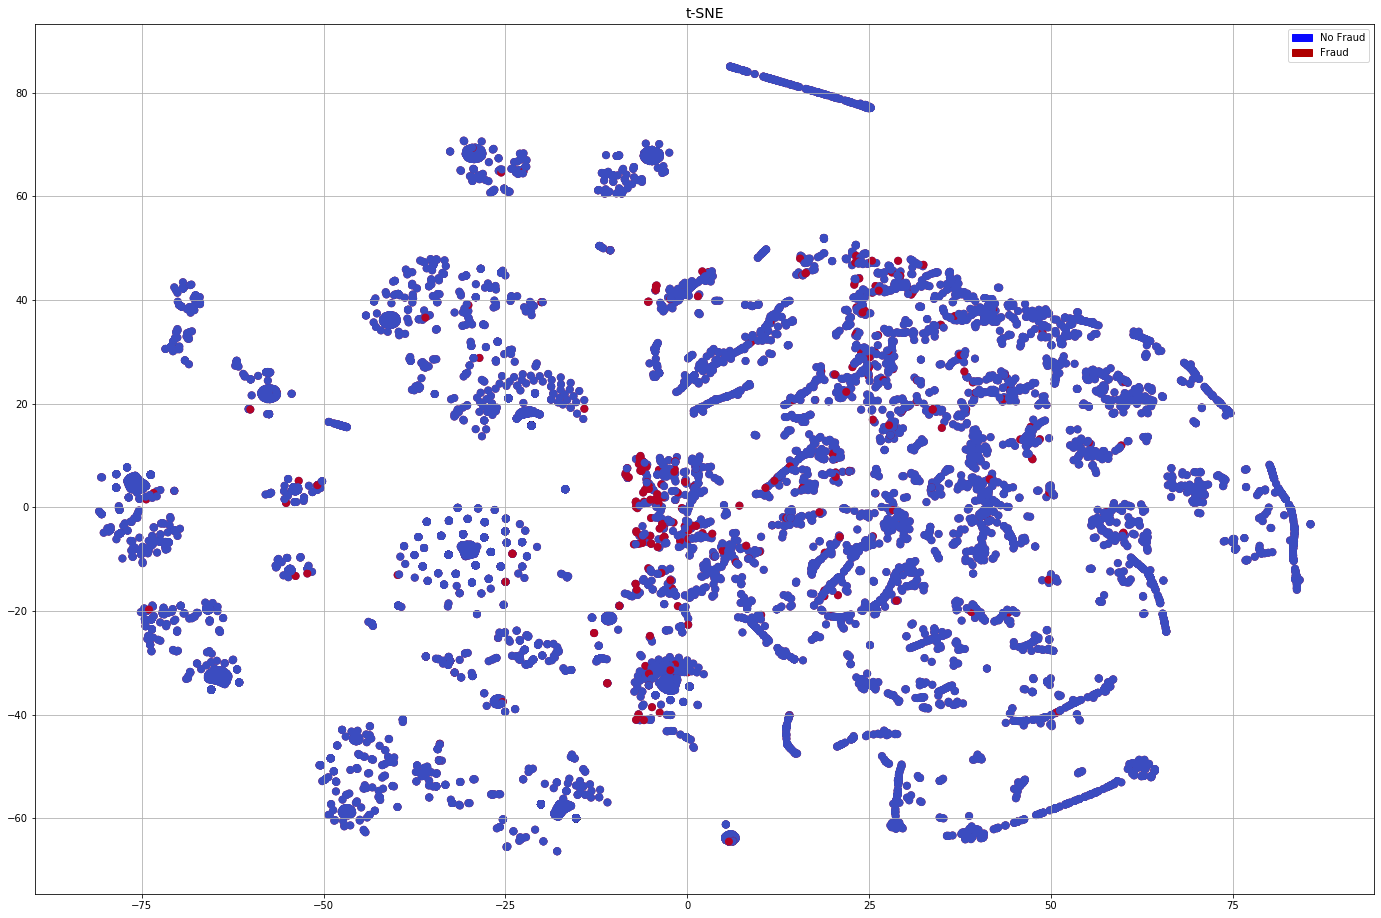

In [32]:
# t-SNE scatter plot
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

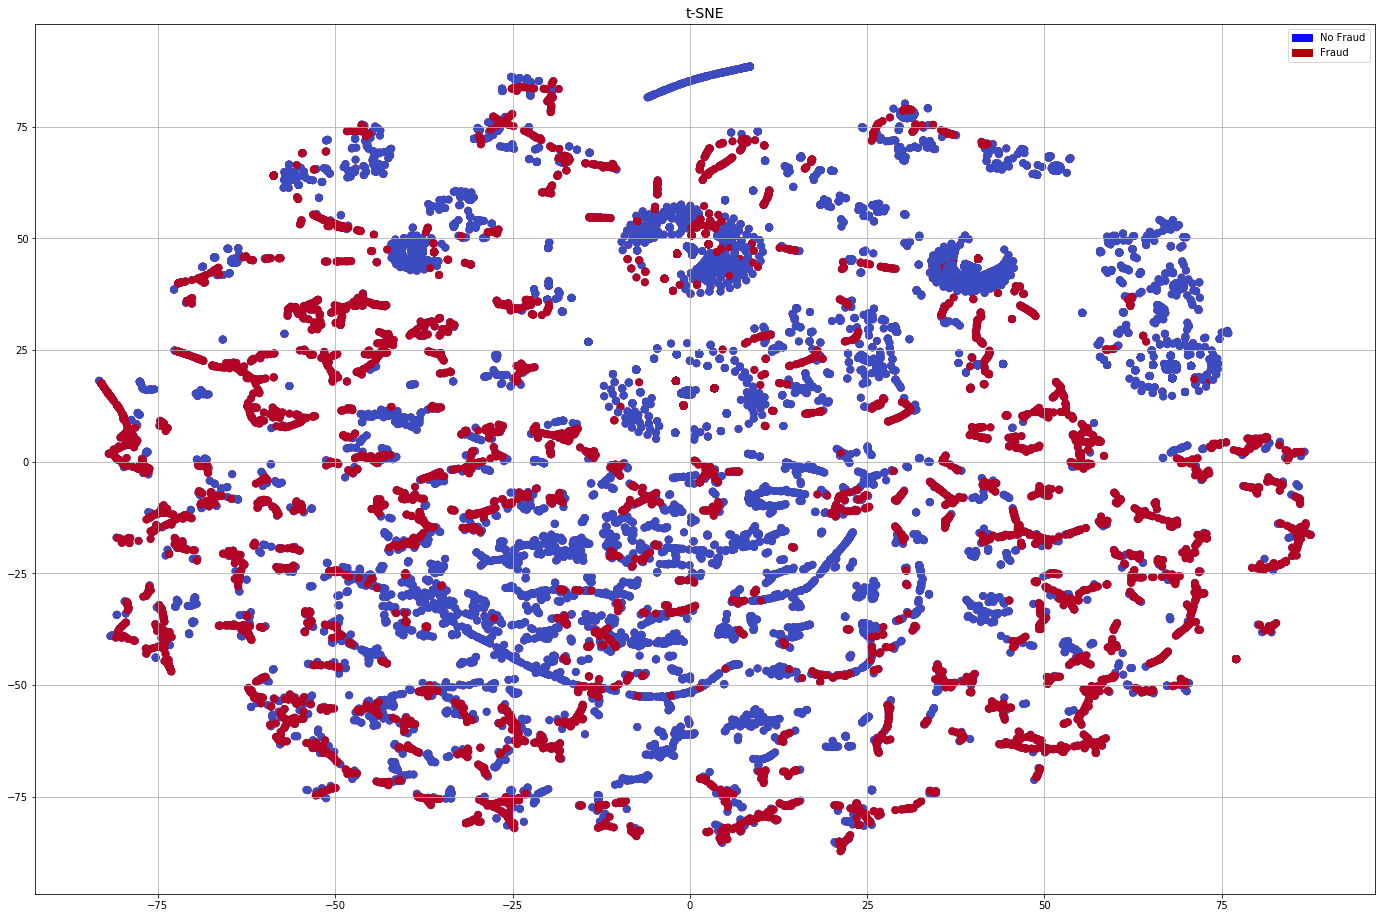

In [18]:
# t-SNE scatter plot
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

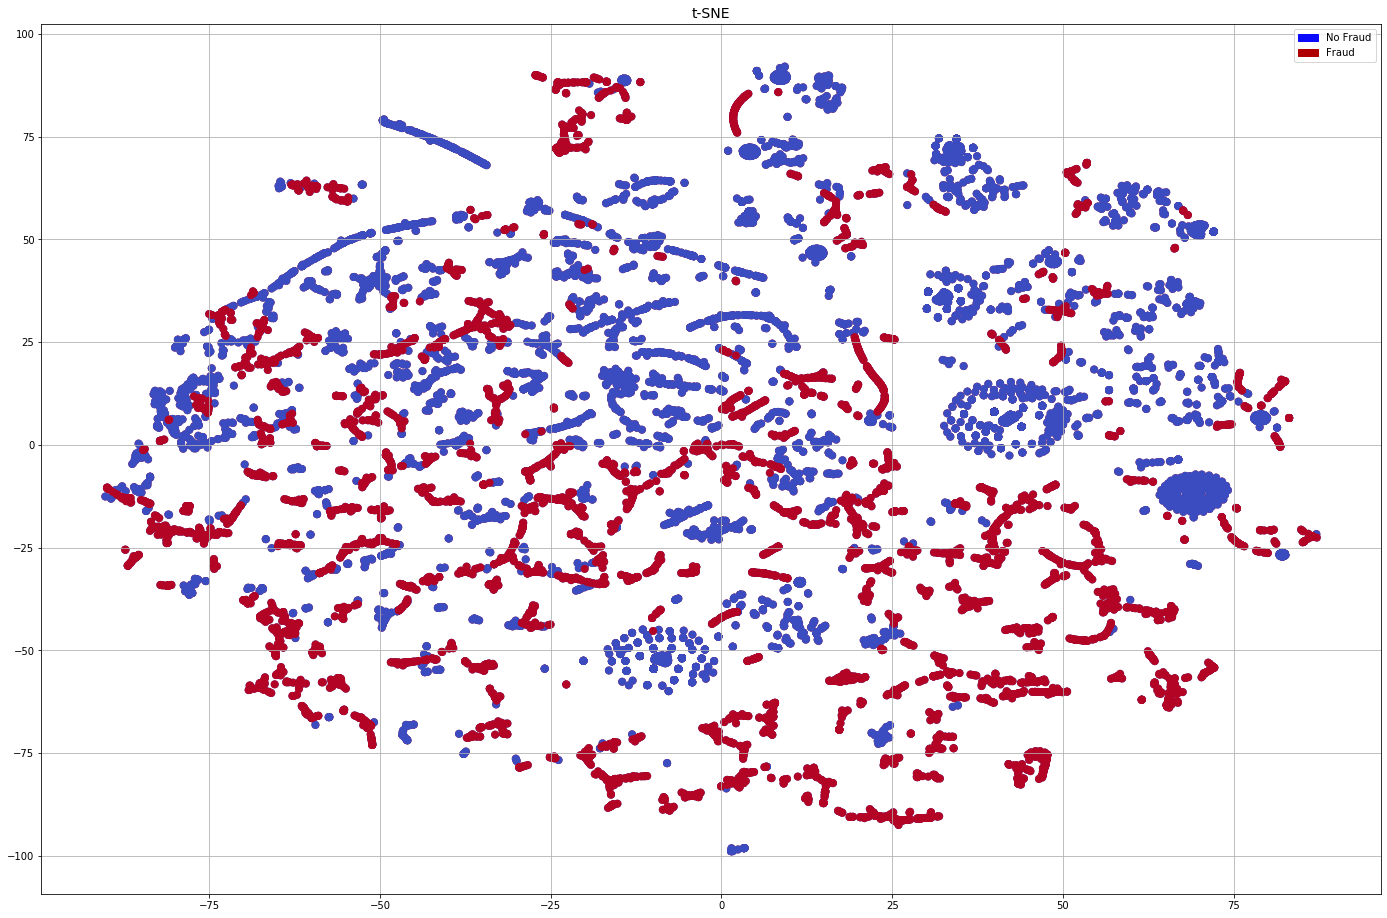

In [38]:
# t-SNE scatter plot
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

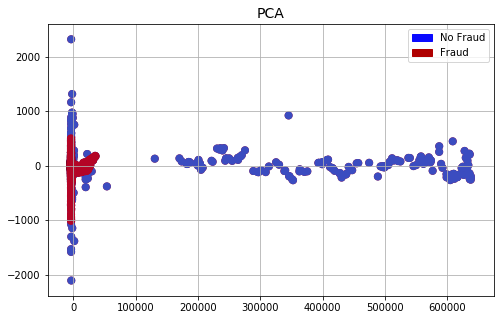

In [40]:
# PCA scatter plot
f, ax = plt.subplots(figsize=(8,5))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# for i in range(0, 29):
ax.scatter(skl_pca[:,0], skl_pca[:,-1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(skl_pca[:,0], skl_pca[:,-1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
    
ax.set_title('PCA', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [43]:
df_pca = pd.DataFrame(skl_pca)

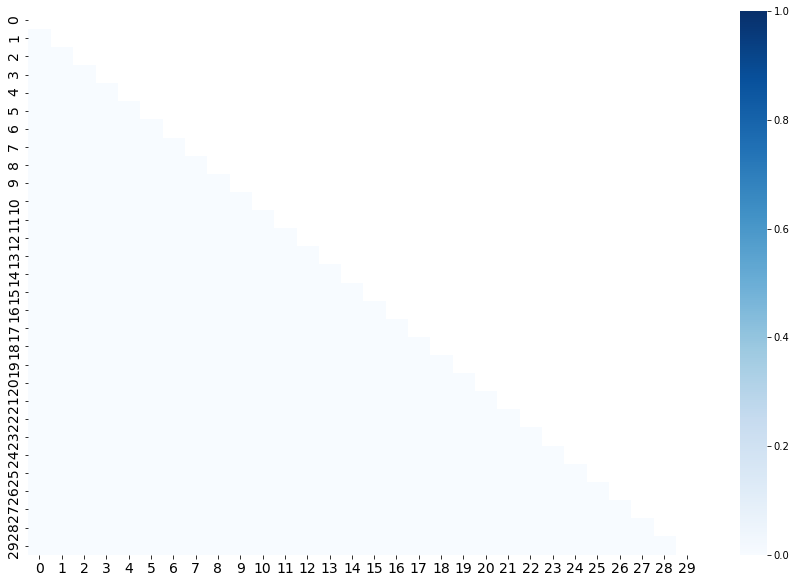

In [44]:
# plot heatmap to check correlation

data_corr = df_pca.corr()
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(15, 10))
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(data_corr, mask=mask, ax=ax, cmap='Blues')
# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.show()

# Training

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# # X1_train, X1_test, y1_train, y1_test = train_test_split(X_reduced_tsne, y, random_state = 42)
# X2_train, X2_test, y2_train, y2_test = train_test_split(skl_pca, y,random_state = 42)

In [45]:
dtc = DecisionTreeClassifier()
lr = LogisticRegression(max_iter=100000)
svc = SVC(kernel='linear')
lsvc = LinearSVC(random_state=0, tol=1e-5)
rfc = RandomForestClassifier()
xgbc = XGBClassifier()

In [46]:
dtc.fit(X_train, y_train)
dtc_y_pred_class = dtc.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, dtc_y_pred_class))

lr.fit(X_train, y_train)
lr_y_pred_class = lr.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, lr_y_pred_class))

lsvc.fit(X_train, y_train)
lsvc_y_pred_class = lsvc.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, lsvc_y_pred_class))

rfc.fit(X_train, y_train)
rfc_y_pred_class = rfc.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, rfc_y_pred_class))

xgbc.fit(X_train, y_train)
xgbc_y_pred_class = xgbc.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, xgbc_y_pred_class))

All columns 0.7488385598141696


C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


All columns 0.72977158343012


C:\Users\andre\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


All columns 0.6600851722802943
All columns 0.783778552071235
All columns 0.7621951219512195


In [12]:
dtc_conmat = np.array(confusion_matrix(y_test, dtc_y_pred_class))

dtc_confusion = pd.DataFrame(dtc_conmat, index=['is_not_Fraud', 'is_Fraud'],
                               columns=['Predicted not Fraud', 'Predicted Fraud'])
    
dtc_confusion

,Predicted not Fraud,Predicted Fraud
is_not_Fraud,127372,0
is_Fraud,0,110658


In [13]:
rfc_conmat = np.array(confusion_matrix(y_test, rfc_y_pred_class))

rfc_confusion = pd.DataFrame(rfc_conmat, index=['is_not_Fraud', 'is_Fraud'],
                               columns=['Predicted not Fraud', 'Predicted Fraud'])
    
rfc_confusion

,Predicted not Fraud,Predicted Fraud
is_not_Fraud,127371,1
is_Fraud,2,110656


In [14]:
xgbc_conmat = np.array(confusion_matrix(y_test, xgbc_y_pred_class))

xgbc_confusion = pd.DataFrame(xgbc_conmat, index=['is_not_Fraud', 'is_Fraud'],
                               columns=['Predicted not Fraud', 'Predicted Fraud'])
    
xgbc_confusion

,Predicted not Fraud,Predicted Fraud
is_not_Fraud,127371,1
is_Fraud,0,110658


In [66]:
dtc.fit(X2_train, y2_train)
dtc_y2_pred_class = dtc.predict(X2_test)
print('Decision Tree', metrics.accuracy_score(y2_test, dtc_y2_pred_class))

lr.fit(X2_train, y2_train)
lr_y2_pred_class = lr.predict(X2_test)
print('Linear', metrics.accuracy_score(y2_test, lr_y2_pred_class))

lsvc.fit(X2_train, y2_train)
lsvc_y2_pred_class = lsvc.predict(X2_test)
print('Linear SVC', metrics.accuracy_score(y2_test, lsvc_y2_pred_class))

rfc.fit(X2_train, y2_train)
rfc_y2_pred_class = rfc.predict(X2_test)
print('Random Forest', metrics.accuracy_score(y2_test, rfc_y2_pred_class))

xgbc.fit(X2_train, y2_train)
xgbc_y2_pred_class = xgbc.predict(X2_test)
print('XGBoost', metrics.accuracy_score(y2_test, xgbc_y2_pred_class))

Decision Tree 0.9626349619795824
Linear 0.7392639583245809


C:\Users\andre\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC 0.6504852329538293
Random Forest 0.9815317396966768
XGBoost 0.8453010124774188


### Decision Tree Classifier

In [48]:
dtc.fit(X_train, y_train)
dtc_y_pred_class = dtc.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, dtc_y_pred_class))

dtc.fit(X1_train, y1_train)
dtc_y_pred_class = dtc.predict(X1_test)
print('T-SNE      ', metrics.accuracy_score(y1_test, dtc_y_pred_class))

dtc.fit(X2_train, y2_train)
dtc_y_pred_class = dtc.predict(X2_test)
print('PCA        ', metrics.accuracy_score(y2_test, dtc_y_pred_class))

All columns 0.9701616245337754
T-SNE       0.9610443431413178
PCA         0.966639038541235


### Logistic Regression

In [49]:
lr.fit(X_train, y_train)
lr_y_pred_class = lr.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, lr_y_pred_class))

lr.fit(X1_train, y1_train)
lr_y1_pred_class = lr.predict(X1_test)
print('T-SNE      ', metrics.accuracy_score(y1_test, lr_y1_pred_class))

lr.fit(X2_train, y2_train)
lr_y2_pred_class = lr.predict(X2_test)
print('PCA        ', metrics.accuracy_score(y2_test, lr_y2_pred_class))

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


All columns 0.967882304185661
T-SNE       0.9473684210526315
PCA         0.9687111479486117


In [45]:
lr.fit(X_train, y_train)
lr_y_pred_class = lr.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, lr_y_pred_class))

# lr.fit(X1_train, y1_train)
# lr_y1_pred_class = lr.predict(X1_test)
# print('T-SNE      ', metrics.accuracy_score(y1_test, lr_y1_pred_class))

lr.fit(X2_train, y2_train)
lr_y2_pred_class = lr.predict(X2_test)
print('PCA        ', metrics.accuracy_score(y2_test, lr_y2_pred_class))

All columns 0.7179978445695127
PCA         0.7066219614417435


In [ ]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y1_test, lr_y1_pred_class)
roc_auc = roc_auc_score(y1_test, lr_y1_pred_class)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

### SVC

In [ ]:
svc.fit(X_train, y_train)
svc_y_pred_class = svc.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, svc_y_pred_class))

svc.fit(X1_train, y1_train)
svc_y1_pred_class = svc.predict(X1_test)
print('T-SNE      ', metrics.accuracy_score(y1_test, svc_y1_pred_class))

svc.fit(X2_train, y2_train)
svc_y2_pred_class = svc.predict(X2_test)
print('PCA        ', metrics.accuracy_score(y2_test, svc_y2_pred_class))

All columns 0.9687111479486117
T-SNE       0.9475756319933692


### Linear SVC

In [9]:
lsvc.fit(X_train, y_train)
lsvc_y_pred_class = lsvc.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, lsvc_y_pred_class))

lsvc.fit(X1_train, y1_train)
lsvc_y1_pred_class = lsvc.predict(X1_test)
print('T-SNE      ', metrics.accuracy_score(y1_test, lsvc_y1_pred_class))

lsvc.fit(X2_train, y2_train)
lsvc_y2_pred_class = lsvc.predict(X2_test)
print('PCA        ', metrics.accuracy_score(y2_test, lsvc_y2_pred_class))

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


All columns 0.7132200580190634


C:\Users\andre\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


T-SNE       0.904890178201409
PCA         0.9639452963116453


C:\Users\andre\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7118506464230969 0.9048785514626638 0.9640165395002942


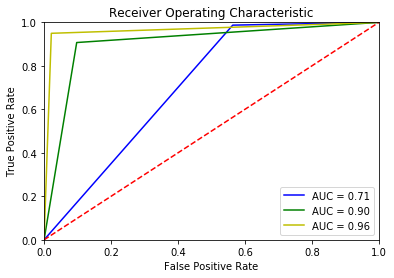

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lsvc_y_pred_class, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, lsvc_y1_pred_class, pos_label=1)
roc_auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, lsvc_y2_pred_class, pos_label=1)
roc_auc2 = metrics.auc(fpr2, tpr2)
print(roc_auc, roc_auc1, roc_auc2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'g', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'y', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Classifier

In [14]:
rfc.fit(X_train, y_train)
rfc_y_pred_class = rfc.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, rfc_y_pred_class))

rfc.fit(X1_train, y1_train)
rfc_y1_pred_class = rfc.predict(X1_test)
print('T-SNE      ', metrics.accuracy_score(y1_test, rfc_y1_pred_class))

rfc.fit(X2_train, y2_train)
rfc_y2_pred_class = rfc.predict(X2_test)
print('PCA        ', metrics.accuracy_score(y2_test, rfc_y2_pred_class))

All columns 0.9096227613629584


In [ ]:
rfc.fit(X, y)
rfc_y_pred_class = rfc.predict(dfs_vtest)
# print('All columns', metrics.accuracy_score(y_test, rfc_y_pred_class))

In [20]:
rfc.fit(X_train, y_train)
rfc_y_pred_class = rfc.predict(X_test)
print('All columns', metrics.accuracy_score(y_test, rfc_y_pred_class))

rfc.fit(X1_train, y1_train)
rfc_y1_pred_class = rfc.predict(X1_test)
print('T-SNE      ', metrics.accuracy_score(y1_test, rfc_y1_pred_class))

rfc.fit(X2_train, y2_train)
rfc_y2_pred_class = rfc.predict(X2_test)
print('PCA        ', metrics.accuracy_score(y2_test, rfc_y2_pred_class))

All columns 0.9936809238241562
T-SNE       0.968701987411409
PCA         0.9820339991078951


In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc_y_pred_class, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9935137782590784


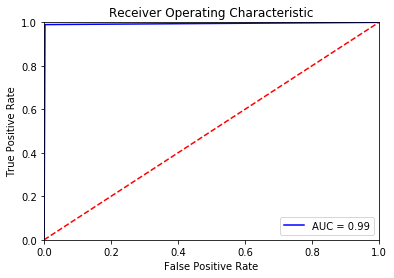

In [23]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
rfc_conmat = np.array(confusion_matrix(y_test, rfc_y_pred_class))

rfc_confusion = pd.DataFrame(rfc_conmat, index=['is_not_Fraud', 'is_Fraud'],
                               columns=['Predicted not Fraud', 'Predicted Fraud'])
    
rfc_confusion

,Predicted not Fraud,Predicted Fraud
is_not_Fraud,21012,57
is_Fraud,198,19087


In [25]:
rfc1_conmat = np.array(confusion_matrix(y1_test, rfc_y1_pred_class))

rfc1_confusion = pd.DataFrame(rfc1_conmat, index=['is_not_Fraud', 'is_Fraud'],
                               columns=['Predicted not Fraud', 'Predicted Fraud'])
    
rfc1_confusion

,Predicted not Fraud,Predicted Fraud
is_not_Fraud,20360,709
is_Fraud,554,18731


In [26]:
rfc2_conmat = np.array(confusion_matrix(y2_test, rfc_y2_pred_class))

rfc2_confusion = pd.DataFrame(rfc2_conmat, index=['is_not_Fraud', 'is_Fraud'],
                               columns=['Predicted not Fraud', 'Predicted Fraud'])
    
rfc2_confusion

,Predicted not Fraud,Predicted Fraud
is_not_Fraud,20634,435
is_Fraud,290,18995


In [46]:
print(classification_report(y_test, rfc_y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2131
           1       0.99      0.99      0.99      2030

    accuracy                           0.99      4161
   macro avg       0.99      0.99      0.99      4161
weighted avg       0.99      0.99      0.99      4161



In [47]:
print(classification_report(y1_test, rfc_y1_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2131
           1       0.98      0.99      0.99      2030

    accuracy                           0.99      4161
   macro avg       0.99      0.99      0.99      4161
weighted avg       0.99      0.99      0.99      4161



In [48]:
print(classification_report(y2_test, rfc_y2_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2131
           1       0.97      0.99      0.98      2030

    accuracy                           0.98      4161
   macro avg       0.98      0.98      0.98      4161
weighted avg       0.98      0.98      0.98      4161



### XGBoost

In [36]:
xgbc.fit(X_train, y_train)
xgbc_y_pred_class = xgbc.predict(X_test)
y_pred_proba = xgbc.predict_proba(X_test)
print('All columns', metrics.accuracy_score(y_test, xgbc_y_pred_class))

# xgbc.fit(X1_train, y1_train)
# xgbc_y1_pred_class = xgbc.predict(X1_test)
# y1_pred_proba = xgbc.predict_proba(X1_test)
# print('T-SNE      ', metrics.accuracy_score(y1_test, xgbc_y1_pred_class))

xgbc.fit(X2_train, y2_train)
xgbc_y2_pred_class = xgbc.predict(X2_test)
y2_pred_proba = xgbc.predict_proba(X2_test)
print('PCA        ', metrics.accuracy_score(y2_test, xgbc_y2_pred_class))

All columns 0.8790653353772216
PCA         0.7658573973567552


In [27]:
xgbc.fit(X_train, y_train)
xgbc_y_pred_class = xgbc.predict(X_test)
y_pred_proba = xgbc.predict_proba(X_test)
print('All columns', metrics.accuracy_score(y_test, xgbc_y_pred_class))

xgbc.fit(X1_train, y1_train)
xgbc_y1_pred_class = xgbc.predict(X1_test)
y1_pred_proba = xgbc.predict_proba(X1_test)
print('T-SNE      ', metrics.accuracy_score(y1_test, xgbc_y1_pred_class))

xgbc.fit(X2_train, y2_train)
xgbc_y2_pred_class = xgbc.predict(X2_test)
y2_pred_proba = xgbc.predict_proba(X2_test)
print('PCA        ', metrics.accuracy_score(y2_test, xgbc_y2_pred_class))

All columns 0.9455568221242008
T-SNE       0.7713485651979978
PCA         0.8554046686821628


In [28]:
xgbc_conmat = np.array(confusion_matrix(y_test, xgbc_y_pred_class))

xgbc_confusion = pd.DataFrame(xgbc_conmat, index=['is_not_Fraud', 'is_Fraud'],
                               columns=['Predicted not Fraud', 'Predicted Fraud'])
    
xgbc_confusion

,Predicted not Fraud,Predicted Fraud
is_not_Fraud,20553,516
is_Fraud,1681,17604


In [10]:
sect_1 = pd.DataFrame({'Feature': ['Decision Tree Classifier', 'Logistic Regression', 'Random Forest Classifier', 'XGBoost', 'Linear SVC'], 
              'All columns': [0.970161625, 0.967882304, 0.982801492, 0.984459179, 0.7132200580190634], 
              'T-SNE': [0.961044343, 0.947368421, 0.976792375, 0.974927476, 0.904890178201409],
              'PCA': [0.966639039, 0.968711148, 0.981972648, 0.981765437, 0.9639452963116453]
                      })

In [11]:
sect_1

,Feature,All columns,T-SNE,PCA
0,Decision Tree Classifier,0.97,0.96,0.97
1,Logistic Regression,0.97,0.95,0.97
2,Random Forest Classifier,0.98,0.98,0.98
3,XGBoost,0.98,0.97,0.98
4,Linear SVC,0.71,0.90,0.96


In [ ]:
xgbc_probs = y_pred_proba[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
xgbc_auc = roc_auc_score(y_test, xgbc_probs)

In [ ]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (xgbc_auc))

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, xgbc_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
roc_auc_score(y_test, xgbc_y_pred_class)

In [ ]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, xgbc_y_pred_class)
roc_auc = auc(y_test, xgbc_y_pred_class)
# roc_auc = roc_auc_score(y_test, xgbc_y_pred_class)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# ## back to dataframe and add our headers
# df = oe.inverse_transform(oversampled_train)
# df_job_newer = pd.DataFrame(data=df, columns=oversampled_train.columns)

In [ ]:
sns.distplot(df2,kde=False, bins=20)

In [ ]:
for i in range(0, len(df2.columns), 5):
    sns.pairplot(data=df2,
                x_vars=df2.columns[i:i+5],
                y_vars=['isFraud'])

In [ ]:
corr = df2.corr() 
plt.figure(figsize=(20, 15))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], mask = np.zeros_like(corr),
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

In [ ]:
sns.boxplot(df2.isFraud)

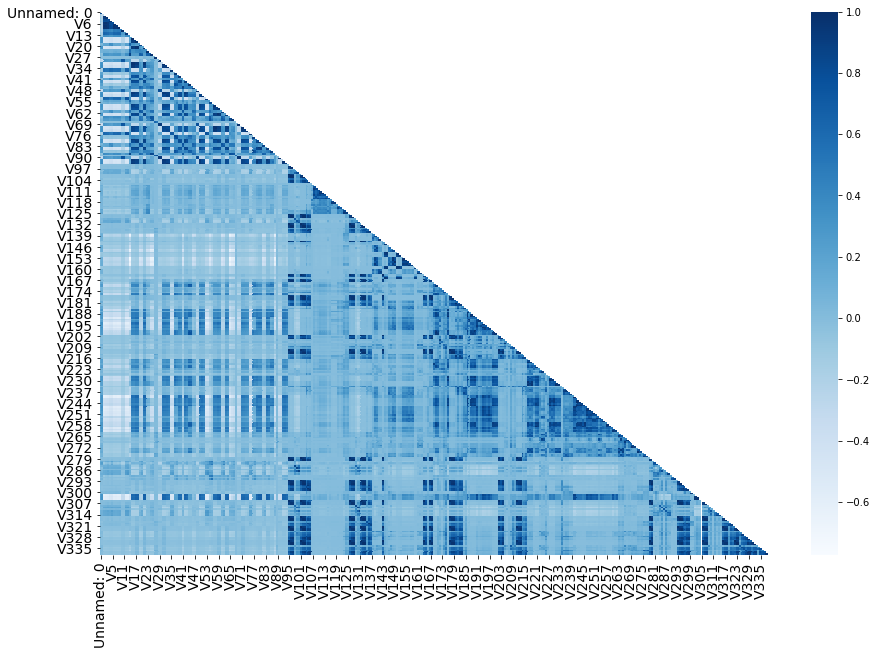

In [45]:
# plot heatmap to check correlation

data_corr = df2.corr()
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(15, 10))
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(data_corr, mask=mask, ax=ax, cmap='Blues')
# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.show()